# All Lending Club loan data
[source](https://www.kaggle.com/benesalvatore/predict-default-using-logisitic-regression)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
df = pd.read_csv("../../../../Documents/data/lending-club/accepted_2007_to_2018Q2.csv.gz",
                 compression='gzip')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


> We are only going to look at loans that either have the loan status 'Default' or 'Fully Paid'

In [4]:
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

In [5]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,843934.000000,843934.000000,843934.000000,843934.00000,843934.000000,8.439340e+05,843838.000000,843934.000000,843934.000000,...,593.0,593.000000,593.0,593.000000,102.000000,593.000000,593.000000,12751.000000,12751.000000,12751.000000
mean,NaN,14322.610506,14309.195713,14276.657237,13.48929,436.635541,7.543727e+04,17.883212,0.304566,696.054063,...,3.0,160.905042,3.0,16.706577,409.326176,11789.215548,195.799882,5444.722678,48.291787,10.572269
std,NaN,8560.537426,8553.996139,8559.088513,4.65430,257.153274,6.706228e+04,9.481950,0.853495,31.704167,...,0.0,126.550773,0.0,8.796397,374.680802,7546.988818,185.579957,3844.611689,9.010003,8.990030
min,NaN,500.000000,500.000000,0.000000,5.31000,4.930000,0.000000e+00,-1.000000,0.000000,625.000000,...,3.0,2.690000,3.0,0.000000,20.070000,239.790000,0.020000,82.960000,0.200000,0.000000
25%,NaN,8000.000000,8000.000000,7925.000000,9.99000,250.330000,4.531410e+04,11.590000,0.000000,670.000000,...,3.0,62.580000,3.0,11.000000,149.122500,5781.580000,47.870000,2528.060000,45.000000,1.000000
50%,NaN,12000.000000,12000.000000,12000.000000,13.05000,376.180000,6.500000e+04,17.330000,0.000000,690.000000,...,3.0,127.010000,3.0,18.000000,307.170000,10295.440000,145.950000,4567.290000,45.020000,12.000000
75%,NaN,20000.000000,20000.000000,20000.000000,16.29000,576.670000,9.000000e+04,23.630000,0.000000,710.000000,...,3.0,233.030000,3.0,24.000000,552.247500,16024.380000,294.170000,7377.065000,50.000000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,30.99000,1714.540000,9.550000e+06,999.000000,39.000000,845.000000,...,3.0,698.770000,3.0,31.000000,2096.310000,39542.450000,1047.610000,33601.000000,521.350000,181.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843934 entries, 0 to 2004088
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 978.7+ MB


## Data visualization and feature enigineering

> At first we transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.

In [7]:
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [8]:
(df['grade'].value_counts().sort_index()/len(df)).plot.bar()

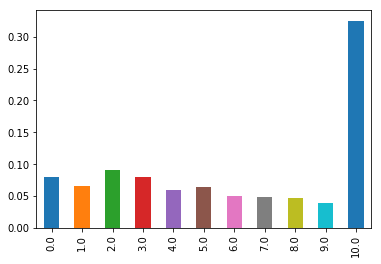

In [9]:
def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

df['emp_length_num'] = df['emp_length'].apply(emp_to_num)
(df['emp_length_num'].value_counts().sort_index()/len(df)).plot.bar()

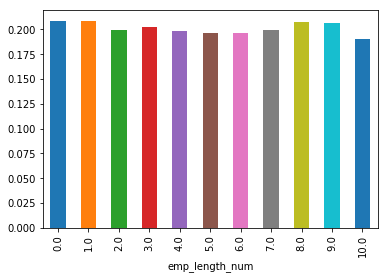

In [10]:
#Is there a connection between employment length and default rate?
df.groupby('emp_length_num')['loan_status_bin'].mean().plot.bar()

In [11]:
df['long_emp'] = df['emp_length'].apply(lambda x: 1*(x=='10+ years'))
df['short_emp'] = df['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))

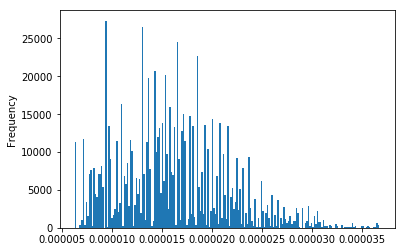

In [12]:
(df['int_rate']/len(df)).plot.hist(bins=200)

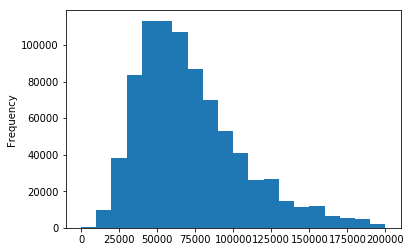

In [13]:
df[df['annual_inc']<200000]['annual_inc'].plot.hist(bins=20)
df['annual_inc_log'] = df['annual_inc'].apply(np.log)

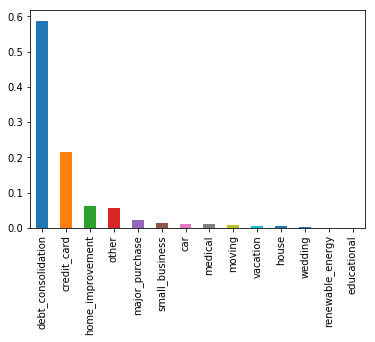

In [14]:
#Which are the most common reasons for requesting a loan on lending club?

(df['purpose'].value_counts()/len(df)).plot.bar()

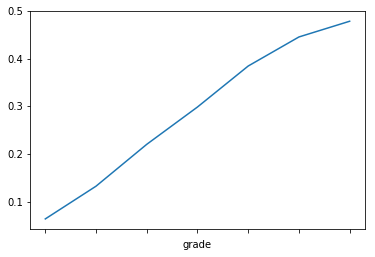

In [15]:
df.groupby('grade')['loan_status_bin'].mean().plot.line()

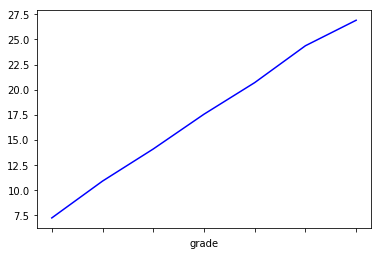

In [16]:
df.groupby('grade')['int_rate'].mean().plot.line(color='blue')

In [17]:
df['grade'].value_counts()

B    243298
C    233576
A    139520
D    132651
E     65166
F     23533
G      6190
Name: grade, dtype: int64

In [18]:
df['grade'].value_counts().sort_index()

A    139520
B    243298
C    233576
D    132651
E     65166
F     23533
G      6190
Name: grade, dtype: int64

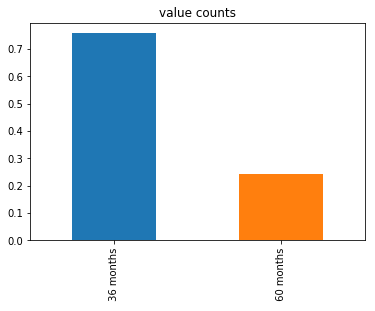

In [19]:
(df['term'].value_counts()/len(df)).plot.bar(title='value counts')

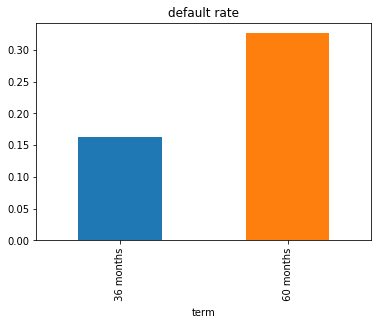

In [20]:
df.groupby('term')['loan_status_bin'].mean().plot.bar(title='default rate')

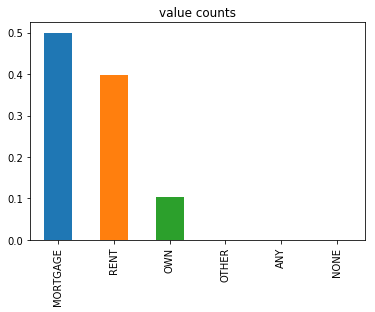

In [21]:
(df['home_ownership'].value_counts()/len(df)).plot.bar(title='value counts')

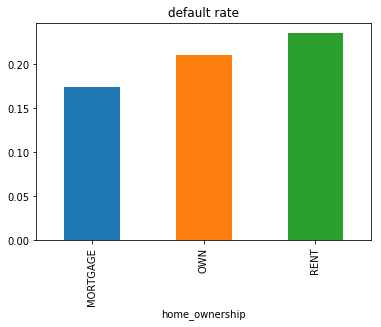

In [22]:
df[(df['home_ownership']=='MORTGAGE') | (df['home_ownership']=='OWN')| (df['home_ownership']=='RENT')].groupby('home_ownership')['loan_status_bin'].mean().plot.bar(title='default rate')

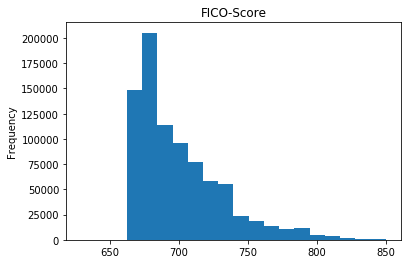

In [23]:
df['fico_range_high'].plot.hist(bins=20, title='FICO-Score')

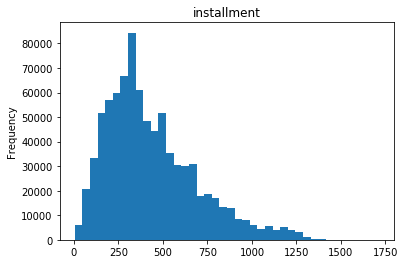

In [24]:
df['installment'].plot.hist(bins=40, title='installment')

# Describing the linear connection between default and interest rate

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1), y=df.groupby('sub_grade')['int_rate'].mean())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'interest rate')

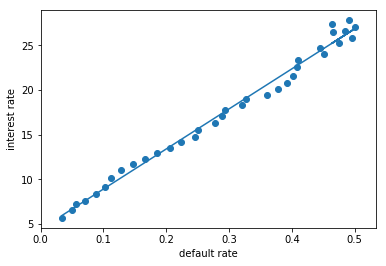

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df.groupby('sub_grade')['loan_status_bin'].mean(), df.groupby('sub_grade')['int_rate'].mean())
plt.plot(df.groupby('sub_grade')['loan_status_bin'].mean(), lr.predict(df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1)))
plt.xlabel('default rate')
plt.ylabel('interest rate')

In [27]:
print('interest rate = ', lr.intercept_, '+', lr.coef_[0], '* default rate')

interest rate =  4.41441106511882 + 44.91066224162108 * default rate


In [28]:
columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc_log', 'verification_status',
       'loan_status_bin', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
df = df[columns]

In [29]:
df.dropna(inplace=True) #Drop all rows that contain null-values.

In [30]:
# Transform the grade into numerical values.
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [31]:
df_dummies = pd.get_dummies(df) #Get the dummy-variables for categorical features.

In [32]:
# We are going to drop all dummy-variables which contain not at least 1% ones.
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)]
df_dummies.drop(drop_columns, axis=1, inplace=True)

In [33]:
df_dummies.head()

,loan_amnt,int_rate,installment,grade,annual_inc_log,loan_status_bin,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,addr_state_NY,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI
0,15000.0,12.39,336.64,3,11.264464,0,12.03,0.0,750.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,10400.0,6.99,321.08,1,10.968198,1,14.92,0.0,710.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,21425.0,15.59,516.36,4,11.063508,0,18.49,0.0,685.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7650.0,13.66,260.20,3,10.819778,1,34.81,0.0,685.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,9600.0,13.66,326.53,3,11.141862,0,25.81,0.0,680.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Add the two different verification status variables that indicate verified to one variable.

df_dummies['verification_status_Verified_sum'] = df_dummies['verification_status_Source Verified']+df_dummies['verification_status_Verified']
df_dummies.drop(['verification_status_Source Verified', 'verification_status_Verified'], axis=1, inplace=True)

In [35]:
df_dummies.head()

,loan_amnt,int_rate,installment,grade,annual_inc_log,loan_status_bin,dti,delinq_2yrs,fico_range_low,inq_last_6mths,...,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI,verification_status_Verified_sum
0,15000.0,12.39,336.64,3,11.264464,0,12.03,0.0,750.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,10400.0,6.99,321.08,1,10.968198,1,14.92,0.0,710.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,21425.0,15.59,516.36,4,11.063508,0,18.49,0.0,685.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,7650.0,13.66,260.20,3,10.819778,1,34.81,0.0,685.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5,9600.0,13.66,326.53,3,11.141862,0,25.81,0.0,680.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Seperate features from targets.

X = df_dummies.drop('loan_status_bin', axis=1)
y = df_dummies['loan_status_bin']

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
# Set up the pipeline. We will use  L1 -penalty for built-in feature selection

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l1', C=0.01)

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [40]:
# Train the logisitc regression model.

In [41]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

ROC-AUC-score:  0.7135184924535466


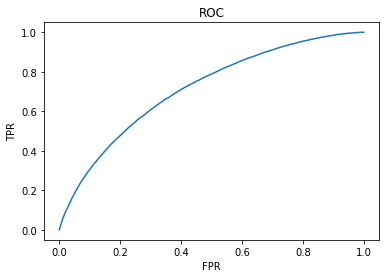

In [42]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [43]:
# Let's see which features are most important.

for i in np.argsort(-np.abs(pipe_lr.named_steps['clf'].coef_[0])):
    print(X.columns[i], ': ', round(pipe_lr.named_steps['clf'].coef_[0,i], 4))

dti :  5.0122
annual_inc_log :  -3.5423
open_acc :  1.8441
grade :  1.8093
fico_range_low :  -1.5838
total_acc :  -0.9305
term_ 60 months :  0.5579
inq_last_6mths :  0.4345
purpose_small_business :  0.3488
installment :  0.3083
addr_state_OR :  -0.3078
addr_state_CO :  -0.3052
loan_amnt :  0.2799
addr_state_WA :  -0.2404
home_ownership_MORTGAGE :  -0.1719
home_ownership_RENT :  0.1652
int_rate :  -0.1497
verification_status_Verified_sum :  0.1476
addr_state_LA :  0.1334
addr_state_AL :  0.1321
addr_state_SC :  -0.1304
addr_state_WI :  -0.1177
addr_state_NY :  0.0775
purpose_medical :  0.0771
addr_state_NV :  0.0656
addr_state_CA :  -0.0644
purpose_credit_card :  -0.0596
addr_state_GA :  -0.0536
emp_length_8 years :  0.0485
addr_state_FL :  0.0408
addr_state_IL :  -0.0408
emp_length_9 years :  0.0395
addr_state_OH :  0.0385
addr_state_CT :  -0.0359
addr_state_IN :  0.0347
purpose_car :  -0.0345
emp_length_< 1 year :  0.0315
addr_state_TN :  0.0293
addr_state_NJ :  0.0285
purpose_home_im

> In the next step we will see whats the connection between default and interest rate when using the Logistic Regression and compare it to the connection we got from the grades. One can control the risk of the investments by choosing different tresholds. The higher one chooses the probability where to seperate good from bad loans the higher the default rate will be. 

In [44]:
def prob_to_pred(theta, proba):
    return [(p<theta) for p in proba]

In [45]:
probs = pipe_lr.predict_proba(X_test)[:,1]
for theta in np.arange(0.03,0.21,0.01):
    print('theta =', round(theta,2), end="  >")
    print(round(y_test.values[prob_to_pred(theta, probs)].mean(),2), end="  ")
    print(round(X_test.values[prob_to_pred(theta, probs), 1].mean(),2), end="  ")
    print(round(lr.predict(y_test.values[prob_to_pred(theta, probs)].mean().reshape(-1,1))[0],2))

theta = 0.03  >0.02  6.36  5.18
theta = 0.04  >0.02  6.5  5.14
theta = 0.05  >0.02  6.76  5.45
theta = 0.06  >0.03  7.03  5.71
theta = 0.07  >0.04  7.31  6.1
theta = 0.08  >0.04  7.61  6.4
theta = 0.09  >0.05  7.96  6.76
theta = 0.1  >0.06  8.32  7.06
theta = 0.11  >0.07  8.67  7.38
theta = 0.12  >0.07  9.0  7.67
theta = 0.13  >0.08  9.3  7.96
theta = 0.14  >0.09  9.59  8.26
theta = 0.15  >0.09  9.85  8.53
theta = 0.16  >0.1  10.09  8.76
theta = 0.17  >0.1  10.31  9.0
theta = 0.18  >0.11  10.52  9.2
theta = 0.19  >0.11  10.71  9.45
theta = 0.2  >0.12  10.89  9.65


Look at [ka](https://www.kaggle.com/pileatedperch/predicting-charge-off-from-initial-listing-data)